In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3


In [45]:
conn = mysql.connect("Downloads/sakila-db/sakila-db.sql")

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

AttributeError: module 'mysql' has no attribute 'connect'

In [ ]:
pip install pandas mysql-connector-python

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector

In [ ]:


conn = mysql.connector.connect('data/sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

In [ ]:
conn = sqlite3.connect('Downloads/archive/sqlite-sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

In [ ]:
df.head()

In [ ]:
df['film_rental_duration'].mean()

In [ ]:
df['film_rental_duration'].value_counts().plot(kind = 'bar', figsize = (10,3))

In [ ]:
df.info()

In [ ]:
df['film_rental_rate'].value_counts()

In [ ]:
df['film_rental_rate'].value_counts().plot(kind = 'pie', figsize = (3,3))

In [ ]:
df['film_rental_rate'].value_counts().plot(kind= 'bar', figsize = (10,3))

In [ ]:
df['film_replacement_cost'].value_counts()

In [ ]:
df['film_replacement_cost'].plot(kind = 'box', vert = False, figsize = (10,3))

In [ ]:
ax = df['film_replacement_cost'].plot(kind = 'density', figsize = (10,3))

ax.axvline(df['film_replacement_cost'].mean(), color = 'red')
ax.axvline(df['film_replacement_cost'].median(), color = 'green')

In [ ]:
ax = df['film_replacement_cost'].plot(kind='density', figsize=(14,6))
ax.axvline(df['film_replacement_cost'].mean(), color='red')
ax.axvline(df['film_replacement_cost'].median(), color='green')

In [ ]:
df['film_rating'].value_counts()

In [ ]:
df['film_rating'].value_counts().plot(kind='bar', figsize = (10,3))

<Axes: >

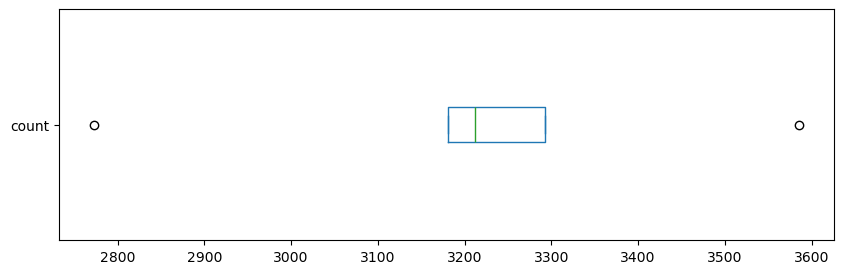

In [46]:
df['film_rating'].value_counts().plot(kind = "box", vert= False, figsize = (10,3))

<Axes: title={'center': 'film_replacement_cost'}, ylabel='[film_rating]'>

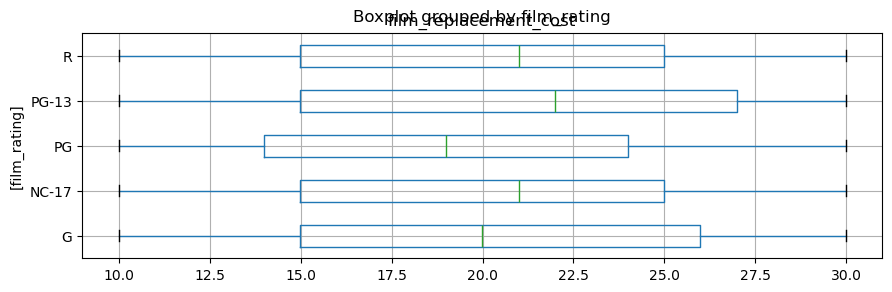

In [47]:
df[['film_rating','film_replacement_cost']].boxplot(by = 'film_rating', vert = False, figsize = (10,3))

<Axes: title={'center': 'film_replacement_cost'}, xlabel='[film_rating]'>

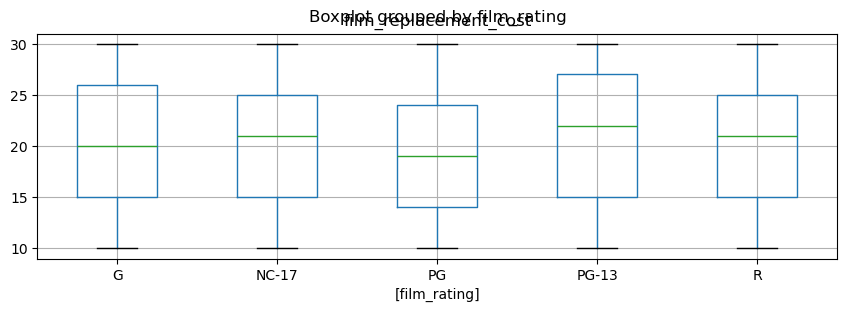

In [49]:
df[['film_rating','film_replacement_cost']].boxplot(by = 'film_rating', figsize = (10,3))

<Axes: title={'center': 'film_replacement_cost'}, xlabel='[film_rating]'>

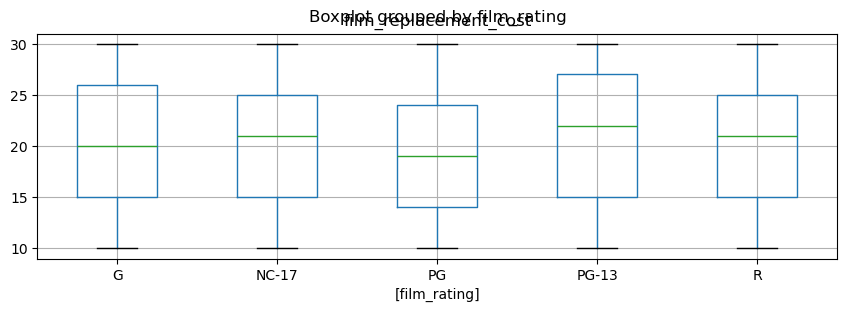

In [52]:
df[['film_replacement_cost', 'film_rating']].boxplot(by='film_rating', figsize = (10,3))

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB


In [56]:
df['rental_days'] = df[['rental_date','return_date']].apply(lambda x: (x.iloc[1] - x.iloc[0]).days, axis = 1)

df['rental_days'].head()

rental_id
1    1.0
2    3.0
3    7.0
4    9.0
5    8.0
Name: rental_days, dtype: float64

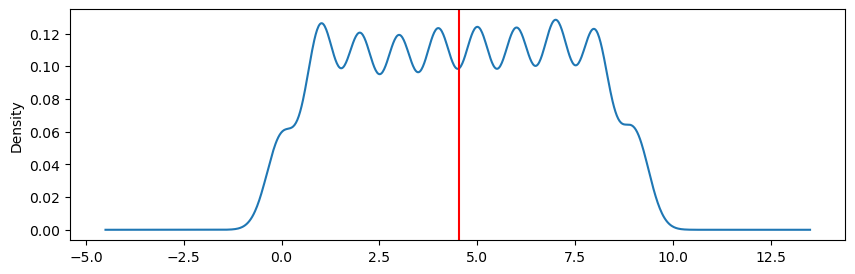

In [58]:
ax = df['rental_days'].plot(kind = 'density', figsize = (10,3))

ax.axvline(df['rental_days'].mean(), color = 'red')

In [59]:
df['rental_days'].mean()

4.525944139713763

In [60]:
df['film_daily_rental_rate'] = df['film_rental_rate'] / df['film_rental_duration']

df['film_daily_rental_rate'].head()

rental_id
1    0.427143
2    0.427143
3    0.427143
4    0.165000
5    0.598000
Name: film_daily_rental_rate, dtype: float64

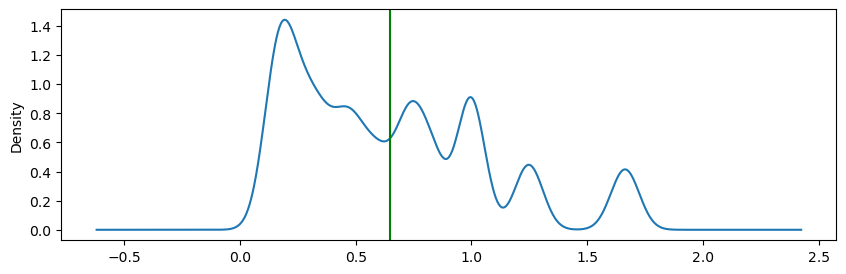

In [62]:
ax = df['film_daily_rental_rate'].plot(kind = 'density', figsize = (10,3))

ax.axvline(df['film_daily_rental_rate'].mean(), color = 'green')

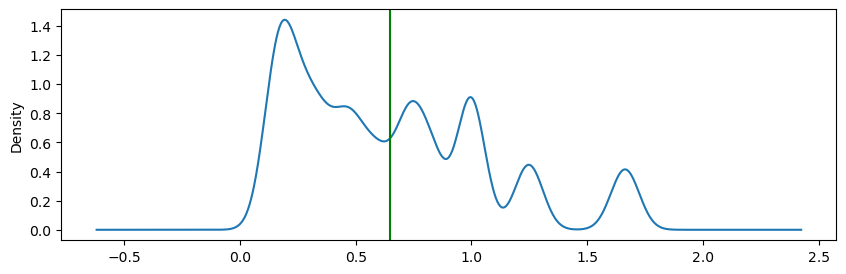

In [66]:
ax = df['film_daily_rental_rate'].plot(kind = 'density', figsize = (10,3))

ax.axvline(df['film_daily_rental_rate'].mean(), color = 'green')

In [70]:
df['film_daily_rental_rate'].sort(ascending = True)

AttributeError: 'DataFrame' object has no attribute 'sort'

In [76]:
s= df['film_daily_rental_rate'].min()
s.loc.head(5)

AttributeError: 'float' object has no attribute 'loc'

In [77]:
df.loc[df['film_daily_rental_rate'] == df['film_daily_rental_rate'].min()].head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
18,2005-05-25 01:10:47,2005-05-31 06:35:47,MARTINEZ,1,Lethbridge,ROMAN PUNK,7,0.99,28.99,NC-17,6.0,0.141429
37,2005-05-25 04:44:31,2005-05-29 01:03:31,ELROD,2,Woodridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,3.0,0.141429
48,2005-05-25 06:20:46,2005-06-02 05:42:46,CASTRO,1,Lethbridge,GUN BONNIE,7,0.99,27.99,G,7.0,0.141429
74,2005-05-25 11:09:48,2005-05-26 12:23:48,TERRY,2,Woodridge,GREEDY ROOTS,7,0.99,14.99,R,1.0,0.141429
76,2005-05-25 11:30:37,2005-06-03 12:00:37,SMITH,2,Woodridge,PATIENT SISTER,7,0.99,29.99,NC-17,9.0,0.141429
87,2005-05-25 13:52:43,2005-05-29 11:12:43,ROBERT,2,Woodridge,GANDHI KWAI,7,0.99,9.99,PG-13,3.0,0.141429
117,2005-05-25 19:30:46,2005-05-31 23:59:46,MILLER,2,Woodridge,VALENTINE VANISHING,7,0.99,9.99,PG-13,6.0,0.141429
133,2005-05-25 21:48:30,2005-05-30 00:26:30,GILBERT,1,Lethbridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,4.0,0.141429
148,2005-05-26 00:25:23,2005-06-01 19:29:23,BURNS,2,Woodridge,UNFORGIVEN ZOOLANDER,7,0.99,15.99,PG,6.0,0.141429


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16044 entries, 1 to 16049
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   rental_date             16044 non-null  datetime64[ns]
 1   return_date             15861 non-null  datetime64[ns]
 2   customer_lastname       16044 non-null  object        
 3   store_id                16044 non-null  int64         
 4   rental_store_city       16044 non-null  object        
 5   film_title              16044 non-null  object        
 6   film_rental_duration    16044 non-null  int64         
 7   film_rental_rate        16044 non-null  float64       
 8   film_replacement_cost   16044 non-null  float64       
 9   film_rating             16044 non-null  object        
 10  rental_days             15861 non-null  float64       
 11  film_daily_rental_rate  16044 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(2), object(

In [80]:
df.loc[df['rental_store_city'] == 'Lethbridge']

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,1.0,0.427143
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,9.0,0.165000
6,2005-05-24 23:08:07,2005-05-27 01:32:07,CHRISTENSON,1,Lethbridge,MYSTIC TRUMAN,5,0.99,19.99,NC-17,2.0,0.198000
8,2005-05-24 23:31:46,2005-05-27 23:33:46,ROMERO,1,Lethbridge,LAWLESS VISION,6,4.99,29.99,G,3.0,0.831667
9,2005-05-25 00:00:40,2005-05-28 00:22:40,SIMPSON,1,Lethbridge,MATRIX SNOWMAN,6,4.99,9.99,PG-13,3.0,0.831667
...,...,...,...,...,...,...,...,...,...,...,...,...
16041,2005-08-23 22:20:26,2005-08-25 20:14:26,GOMEZ,1,Lethbridge,TOMORROW HUSTLER,3,2.99,21.99,R,1.0,0.996667
16043,2005-08-23 22:21:03,2005-08-31 03:09:03,SEAL,1,Lethbridge,STING PERSONAL,3,4.99,9.99,NC-17,7.0,1.663333
16044,2005-08-23 22:24:39,2005-08-25 04:08:39,CARY,1,Lethbridge,EVERYONE CRAFT,4,0.99,29.99,PG,1.0,0.247500


In [82]:
df.loc[df['rental_store_city'] == 'Lethbridge'].shape[0]

7923

In [89]:
df.loc[df['rental_store_city'] == 'Lethbridge', 'film_rating'].value_counts()

film_rating
PG-13    1849
NC-17    1625
R        1537
PG       1535
G        1377
Name: count, dtype: int64

<Axes: xlabel='film_rating'>

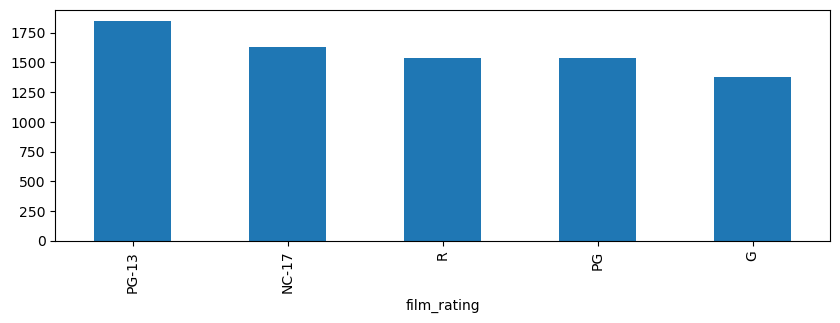

In [90]:
df.loc[df['rental_store_city'] == 'Lethbridge', 'film_rating'].value_counts().plot(kind = 'bar', figsize = (10,3))

In [98]:
df.loc[(df['rental_store_city'] == 'Woodridge') & (df['film_rental_duration'] > 5)].shape[0]

3186

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16044 entries, 1 to 16049
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   rental_date             16044 non-null  datetime64[ns]
 1   return_date             15861 non-null  datetime64[ns]
 2   customer_lastname       16044 non-null  object        
 3   store_id                16044 non-null  int64         
 4   rental_store_city       16044 non-null  object        
 5   film_title              16044 non-null  object        
 6   film_rental_duration    16044 non-null  int64         
 7   film_rental_rate        16044 non-null  float64       
 8   film_replacement_cost   16044 non-null  float64       
 9   film_rating             16044 non-null  object        
 10  rental_days             15861 non-null  float64       
 11  film_daily_rental_rate  16044 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(2), object(

In [100]:
df.loc[(df['store_id'] == 2) | (df['film_replacement_cost'] < 10.99)].shape[0]  

8444